In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data_path = r'C:\Users\uig62727\Downloads\data.csv'
cols = ['Festival_Name', 'Location', 'Country', 'Attendance_Numbers', 'Visitor_Demographics', 'Visitor_Type', 'Economic_Impact', 'Music_Genre']
data_festival = pd.read_csv(data_path, names=cols)
data_festival.head(5)

,Festival_Name,Location,Country,Attendance_Numbers,Visitor_Demographics,Visitor_Type,Economic_Impact,Music_Genre
0,Festival_Name,Location,Attendance_Numbers,Visitor_Demographics,Economic_Impact,Music_Genre,NaN,NaN
1,Glastonbury Festival,Somerset,UK,200000,18-35,Music Enthusiasts,£100 million,Various
2,Tomorrowland,Boom,Belgium,400000,18-30,EDM Fans,€150 million,EDM
3,Sziget Festival,Budapest,Hungary,500000,18-40,International Attendees,€130 million,Various
4,Rock am Ring,Nürburg,Germany,90000,20-40,Rock Fans,€80 million,Rock


In [4]:
data_unique = data_festival.isnull().sum()
data_unique

Festival_Name           0
Location                0
Country                 0
Attendance_Numbers      0
Visitor_Demographics    0
Visitor_Type            0
Economic_Impact         1
Music_Genre             1
dtype: int64

In [5]:
data_festival.Festival_Name

0                       Festival_Name
1                Glastonbury Festival
2                        Tomorrowland
3                     Sziget Festival
4                        Rock am Ring
                    ...              
153                   Electric Picnic
154               Blue Balls Festival
155         Lollapalooza Buenos Aires
156           Valencia Music Festival
157    Festival Internacional de Jazz
Name: Festival_Name, Length: 158, dtype: object

In [6]:
data_festival.Attendance_Numbers

0      Visitor_Demographics
1                    200000
2                    400000
3                    500000
4                     90000
               ...         
153                   50000
154                   35000
155                   60000
156                   35000
157                   40000
Name: Attendance_Numbers, Length: 158, dtype: object

C:\Users\uig62727\AppData\Local\Temp\ipykernel_15316\3150999165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Festival_Name', y='Attendance_Numbers', data=data_festival, palette='viridis')


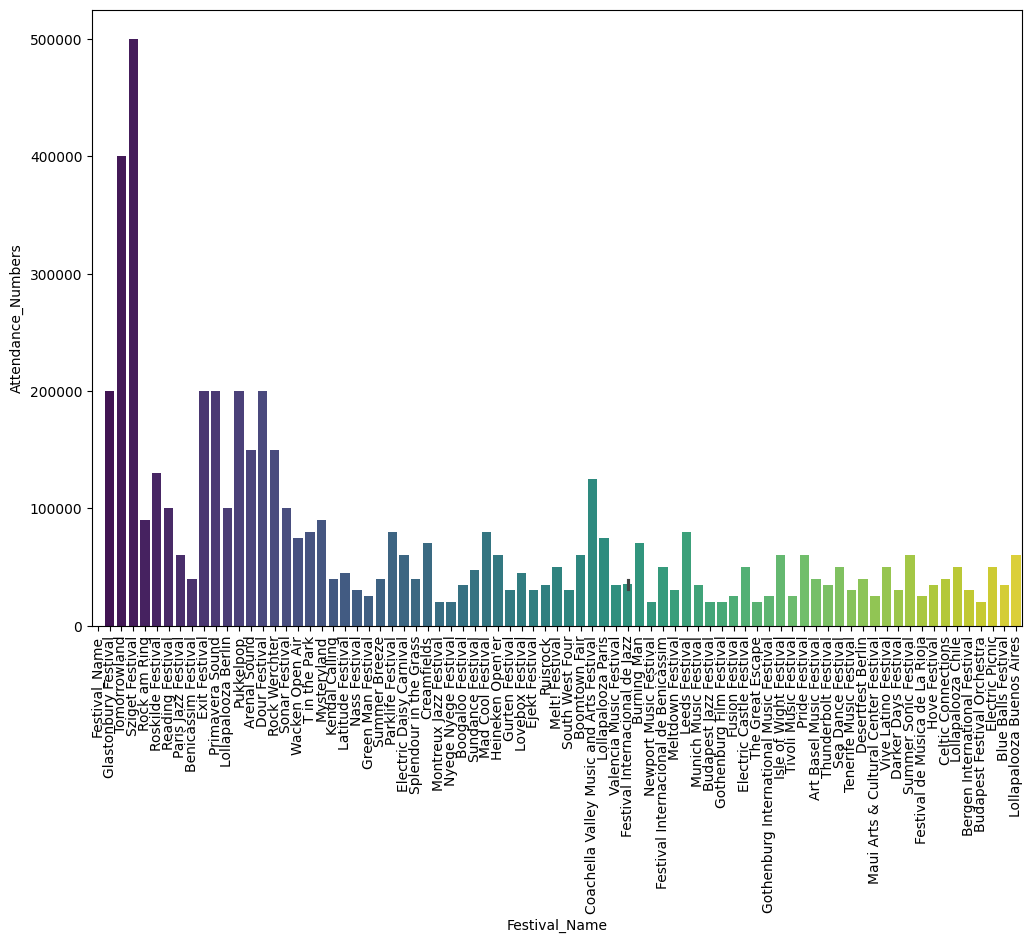

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

data_festival['Attendance_Numbers'] = pd.to_numeric(data_festival['Attendance_Numbers'], errors='coerce')
sns.barplot(x='Festival_Name', y='Attendance_Numbers', data=data_festival, palette='viridis')
plt.xticks(rotation=90)
plt.show()

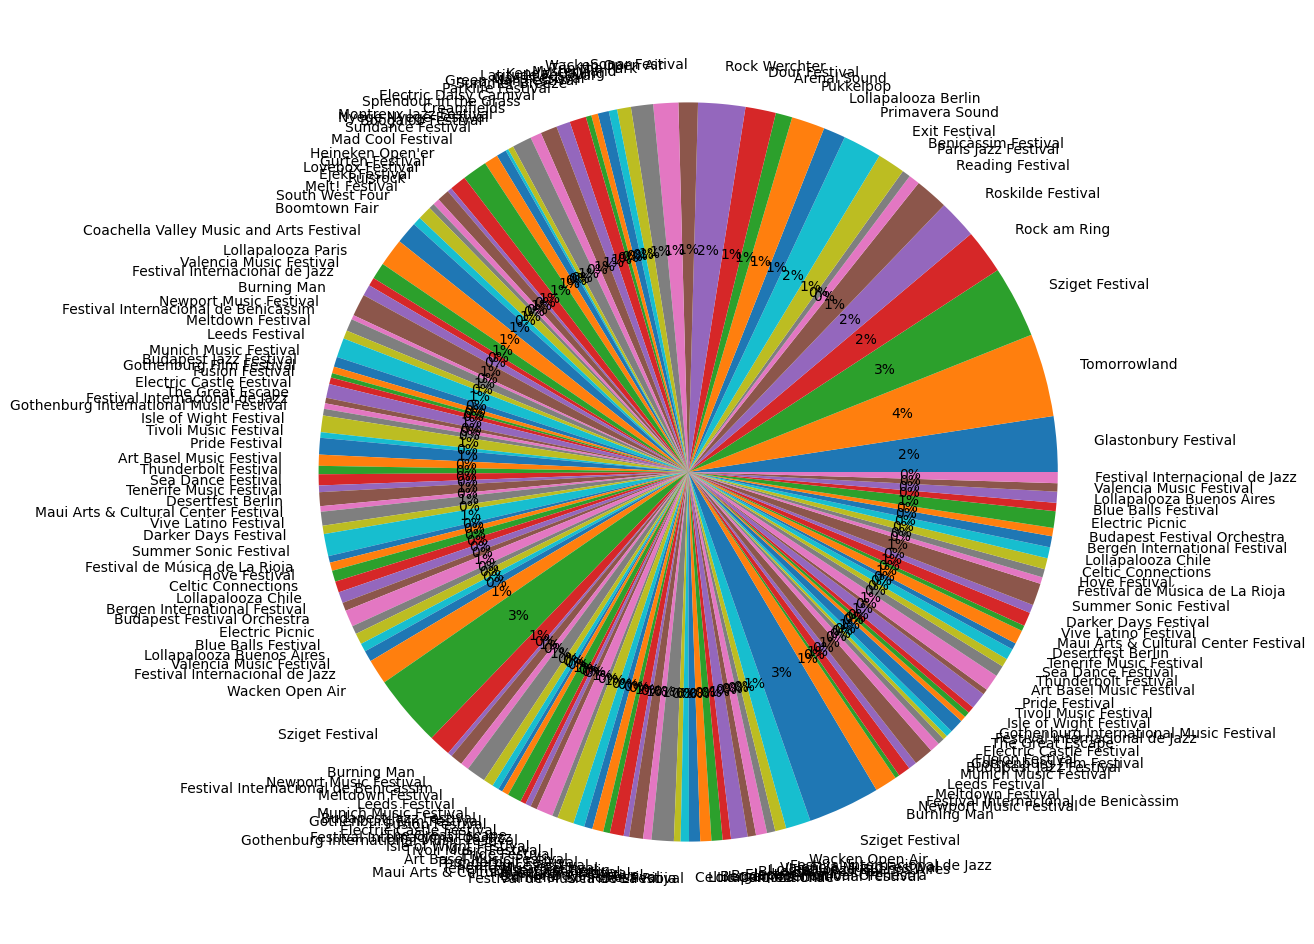

In [8]:
import re

def extract_val(curr_string):
    match = re.search(r'(\d+)', curr_string)
    return float(match.group(1))

plt.figure(figsize=(20,12))
keys = data_festival.iloc[:,0].values[1:]
values = data_festival.Economic_Impact.values[1:]
numbers = np.array([extract_val(s) for s in values])
plt.pie(numbers, labels=keys, autopct='%.0f%%')
plt.show()

In [9]:
data_festival.head()

,Festival_Name,Location,Country,Attendance_Numbers,Visitor_Demographics,Visitor_Type,Economic_Impact,Music_Genre
0,Festival_Name,Location,Attendance_Numbers,NaN,Economic_Impact,Music_Genre,NaN,NaN
1,Glastonbury Festival,Somerset,UK,200000.0,18-35,Music Enthusiasts,£100 million,Various
2,Tomorrowland,Boom,Belgium,400000.0,18-30,EDM Fans,€150 million,EDM
3,Sziget Festival,Budapest,Hungary,500000.0,18-40,International Attendees,€130 million,Various
4,Rock am Ring,Nürburg,Germany,90000.0,20-40,Rock Fans,€80 million,Rock


In [10]:
age_range = data_festival.Visitor_Demographics.values[1:]
age_range

array(['18-35', '18-30', '18-40', '20-40', '18-40', '16-35', '30-60',
       '18-35', '18-30', '20-40', '18-35', '18-35', '16-30', '18-35',
       '18-40', '20-40', '18-45', '18-35', '18-30', '18-35', '18-40',
       '18-35', '18-40', '20-45', '18-30', '18-35', '18-35', '18-35',
       '25-60', '18-40', '18-40', '25-50', '18-35', '18-35', '18-40',
       '18-35', '18-35', '18-35', '18-35', '18-35', '18-40', '18-40',
       '18-35', '18-35', '25-60', '18-50', '25-60', '18-35', '18-40',
       '18-35', '18-40', '25-60', '18-60', '18-35', '18-35', '18-35',
       '25-60', '18-50', '18-40', '18-50', '18-35', '25-60', '18-35',
       '18-35', '18-35', '18-45', '25-60', '18-35', '18-35', '18-35',
       '25-60', '18-35', '25-60', '18-35', '25-60', '25-60', '18-40',
       '25-60', '18-35', '18-35', '25-60', '18-45', '18-40', '18-50',
       '25-60', '18-35', '18-40', '18-35', '18-40', '25-60', '18-60',
       '18-35', '18-35', '18-35', '25-60', '18-50', '18-40', '18-50',
       '18-35', '25-

C:\Users\uig62727\AppData\Local\Temp\ipykernel_15316\4139239129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Festival_Name', y='Visitor_Demographics', data=data_festival, palette='viridis')


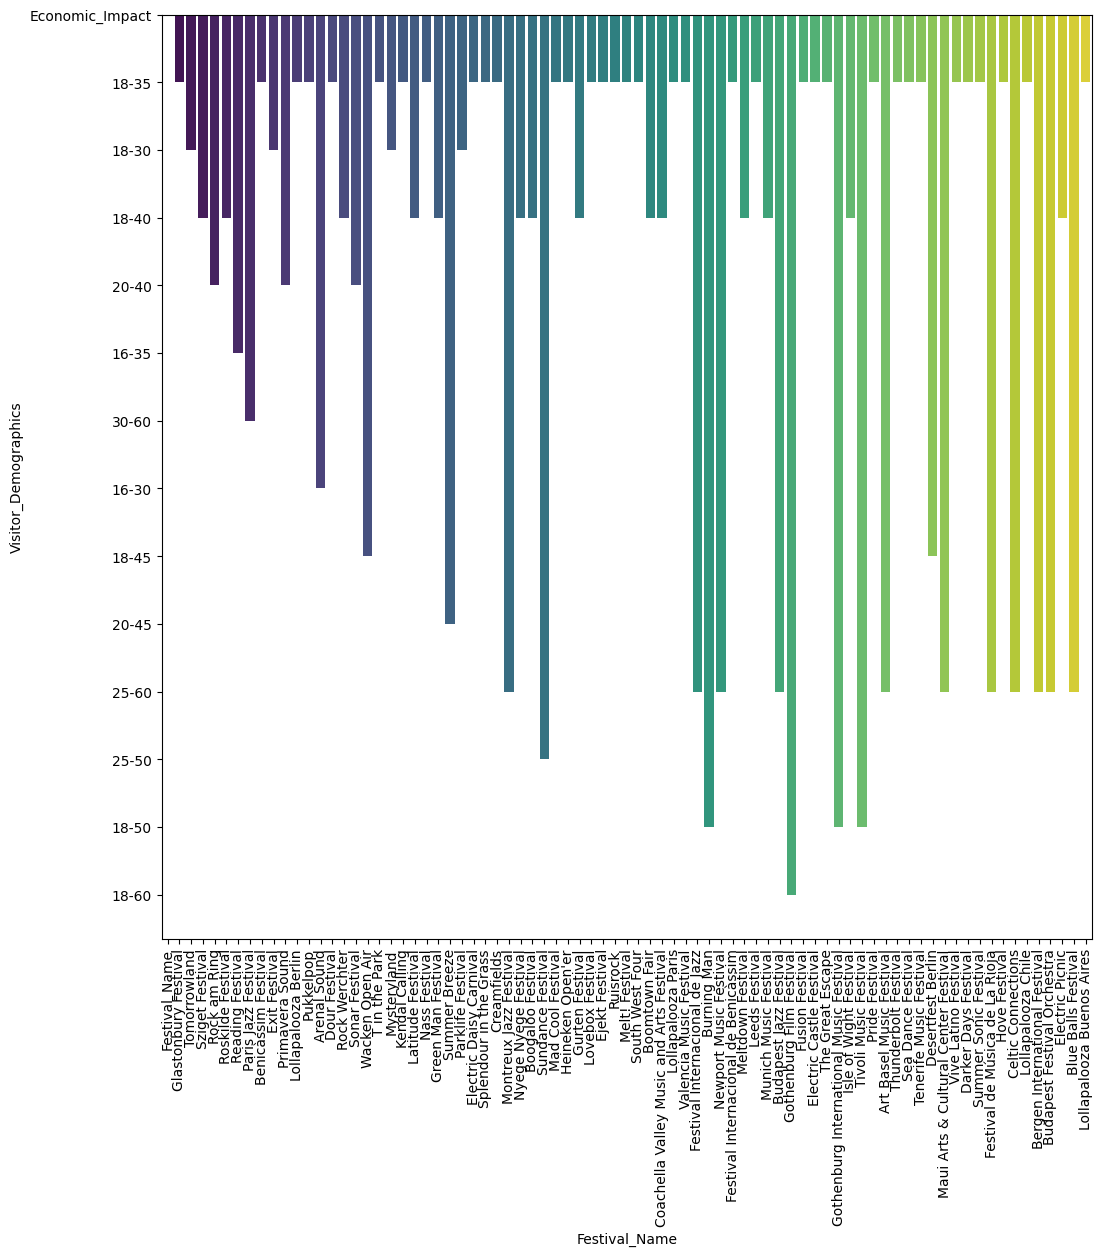

In [17]:
plt.figure(figsize=(12,12))
sns.barplot(x='Festival_Name', y='Visitor_Demographics', data=data_festival, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [12]:
data_festival.head()

,Festival_Name,Location,Country,Attendance_Numbers,Visitor_Demographics,Visitor_Type,Economic_Impact,Music_Genre
0,Festival_Name,Location,Attendance_Numbers,NaN,Economic_Impact,Music_Genre,NaN,NaN
1,Glastonbury Festival,Somerset,UK,200000.0,18-35,Music Enthusiasts,£100 million,Various
2,Tomorrowland,Boom,Belgium,400000.0,18-30,EDM Fans,€150 million,EDM
3,Sziget Festival,Budapest,Hungary,500000.0,18-40,International Attendees,€130 million,Various
4,Rock am Ring,Nürburg,Germany,90000.0,20-40,Rock Fans,€80 million,Rock


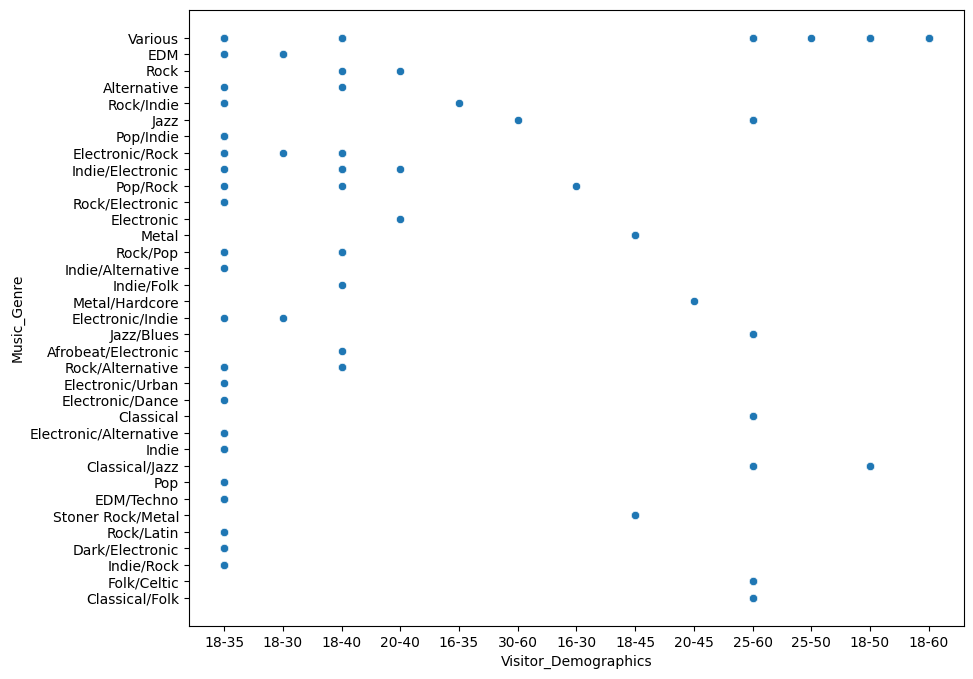

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_festival, x='Visitor_Demographics', y='Music_Genre')
plt.show()

In [14]:
data_festival.head()

,Festival_Name,Location,Country,Attendance_Numbers,Visitor_Demographics,Visitor_Type,Economic_Impact,Music_Genre
0,Festival_Name,Location,Attendance_Numbers,NaN,Economic_Impact,Music_Genre,NaN,NaN
1,Glastonbury Festival,Somerset,UK,200000.0,18-35,Music Enthusiasts,£100 million,Various
2,Tomorrowland,Boom,Belgium,400000.0,18-30,EDM Fans,€150 million,EDM
3,Sziget Festival,Budapest,Hungary,500000.0,18-40,International Attendees,€130 million,Various
4,Rock am Ring,Nürburg,Germany,90000.0,20-40,Rock Fans,€80 million,Rock


C:\Users\uig62727\AppData\Local\Temp\ipykernel_15316\725673089.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_festival.Location.values[1:], y=at_numbers, palette='viridis')


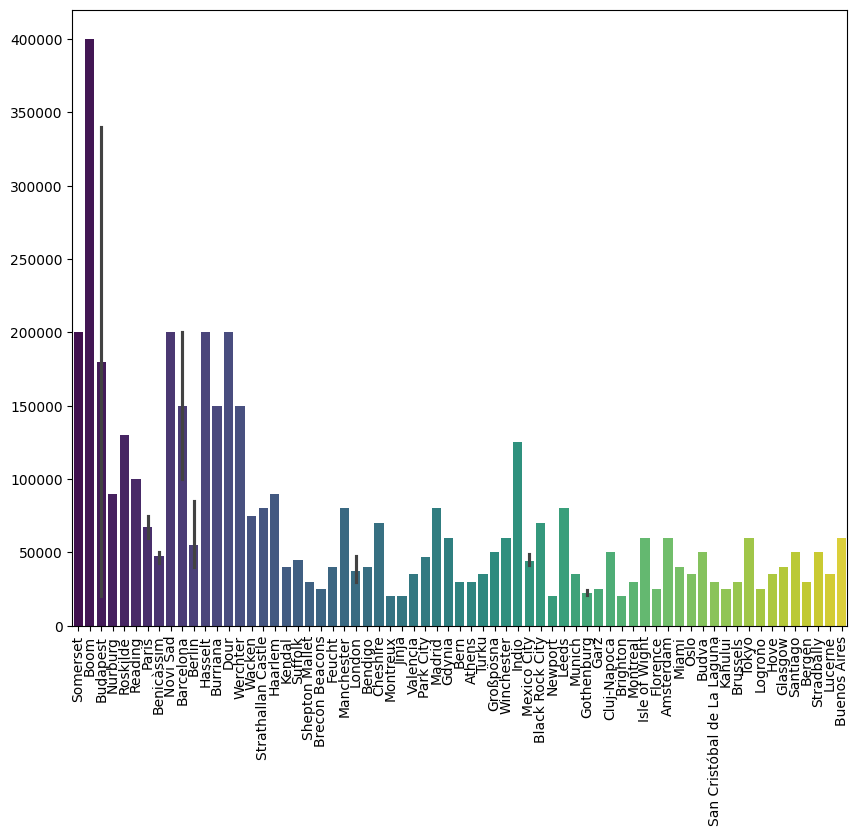

In [15]:
plt.figure(figsize=(10,8))
at_numbers = data_festival.Attendance_Numbers.values[1:].astype('int32')
locations=data_festival.Location.values[1:]
sns.barplot(x=data_festival.Location.values[1:], y=at_numbers, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [19]:
data_festival.head()

,Festival_Name,Location,Country,Attendance_Numbers,Visitor_Demographics,Visitor_Type,Economic_Impact,Music_Genre
0,Festival_Name,Location,Attendance_Numbers,NaN,Economic_Impact,Music_Genre,NaN,NaN
1,Glastonbury Festival,Somerset,UK,200000.0,18-35,Music Enthusiasts,£100 million,Various
2,Tomorrowland,Boom,Belgium,400000.0,18-30,EDM Fans,€150 million,EDM
3,Sziget Festival,Budapest,Hungary,500000.0,18-40,International Attendees,€130 million,Various
4,Rock am Ring,Nürburg,Germany,90000.0,20-40,Rock Fans,€80 million,Rock


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given